<a href="https://colab.research.google.com/github/daurickroy/Entri-Elevate---Project/blob/main/Model_Building_%26_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Model

Build a classification model to predict whether a visitor will generate revenue (i.e., make a purchase), and evaluate the model to improve online shoppers' purchasing intention.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [6]:
df = pd.read_csv('processed_online_shoppers_intention.csv')
print(df.head())
print(df.info())
print(df['Revenue'].value_counts())


   Administrative  Administrative_Duration  Informational  \
0       -0.702302                -0.460019      -0.398824   
1       -0.702302                -0.460019      -0.398824   
2       -0.702302                -0.460019      -0.398824   
3       -0.702302                -0.460019      -0.398824   
4       -0.702302                -0.460019      -0.398824   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.246257       -0.696218                -0.628793   
1               -0.246257       -0.673793                -0.595451   
2               -0.246257       -0.696218                -0.628793   
3               -0.246257       -0.673793                -0.627404   
4               -0.246257       -0.494387                -0.301889   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0     3.969402   3.434394   -0.318962    -0.31024      2         -1.239776   
1    -0.450137   1.268054   -0.318962    -0.31024      2

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


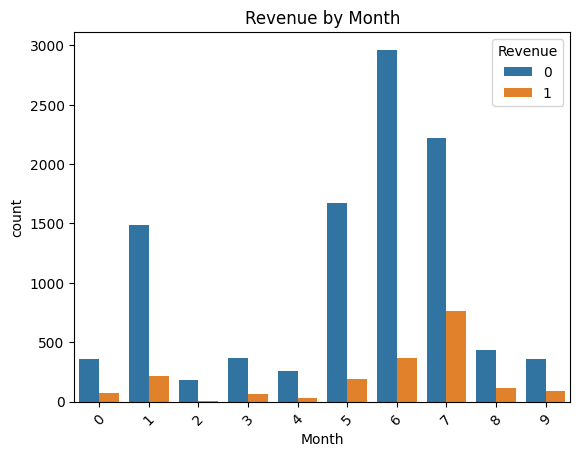

In [27]:
sns.countplot(data=df, x='Month', hue='Revenue')
plt.title("Revenue by Month")
plt.xticks(rotation=45)
plt.show()


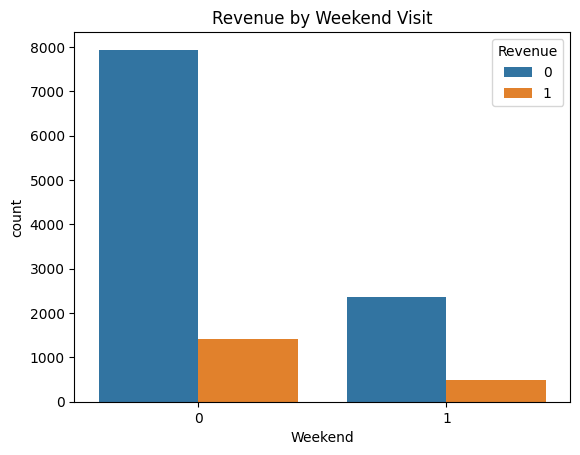

In [28]:
sns.countplot(data=df, x='Weekend', hue='Revenue')
plt.title("Revenue by Weekend Visit")
plt.show()


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [39]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}



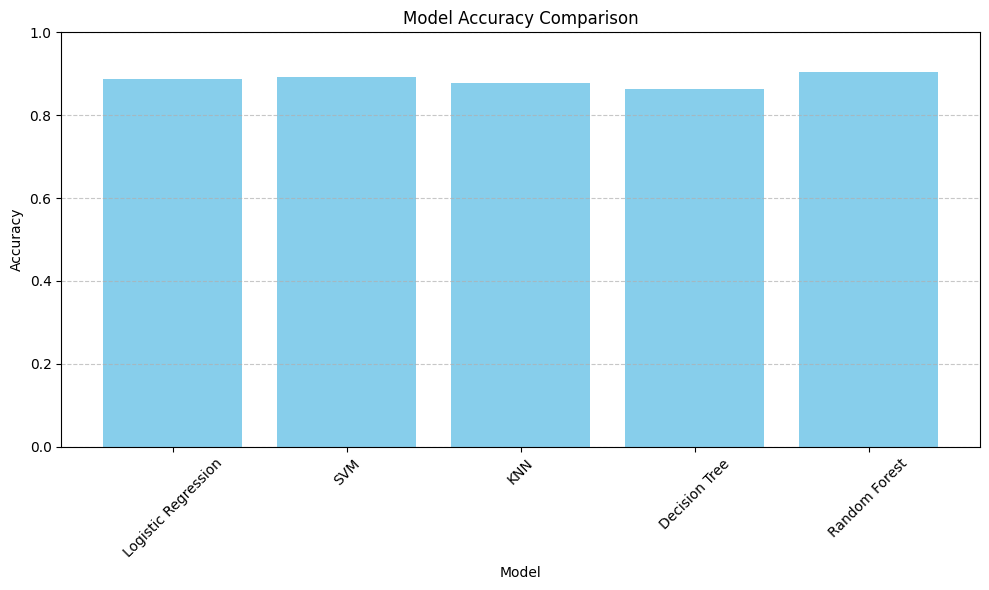

In [45]:
import matplotlib.pyplot as plt

# Assuming you have a dictionary `results` from your evaluations
model_names = list(results.keys())
accuracies = [results[model]["Accuracy"] for model in model_names]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [40]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2059
           1       0.74      0.60      0.66       382

    accuracy                           0.90      2441
   macro avg       0.84      0.78      0.80      2441
weighted avg       0.90      0.90      0.90      2441

[[1980   79]
 [ 154  228]]
Accuracy: 0.9045473166734944


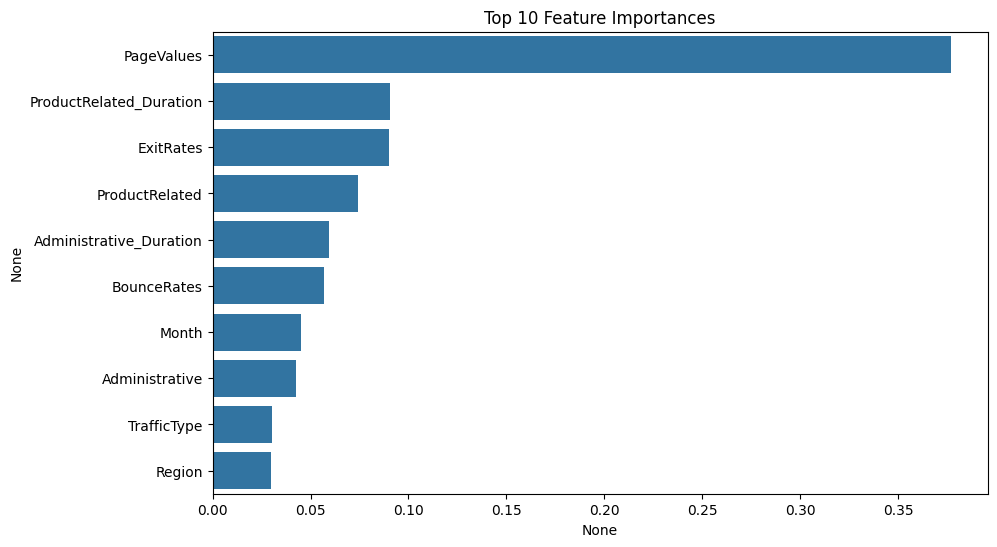

In [46]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


# Feature importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title("Top 10 Feature Importances")
plt.show()


In [44]:
best_model = max(results, key=lambda x: results[x]["Accuracy"])
print(f"Best Model: {best_model}")
print("Classification Report:")
print(results[best_model]["Report"])


Best Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2059
           1       0.74      0.60      0.66       382

    accuracy                           0.90      2441
   macro avg       0.84      0.78      0.80      2441
weighted avg       0.90      0.90      0.90      2441



# Features to Improve for Purchases:
**Based on expected feature importance:**

Increase PageValues (suggests more engagement)

Reduce BounceRates and ExitRates

Optimize ProductRelated_Duration

Consider targeting sessions on Weekends or specific Months